In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import glob

In [20]:
import re

In [21]:
csv_files = glob.glob("sandbox/wdens/*.csv")


In [22]:
number_regexp = '[-+]?[0-9]+(?:\.[0-9]+)?'
convert = lambda text: float(text) if re.match('^' + number_regexp + '$', text) else text
alphanum = lambda key: [ convert(c) for c in re.split('(' + number_regexp + ')', key) ]

In [23]:
csv_files.sort(key=alphanum)

In [24]:
csv_files

['sandbox/wdens/system100.fit.-18.csv',
 'sandbox/wdens/system100.fit.-17.csv',
 'sandbox/wdens/system100.fit.-16.csv',
 'sandbox/wdens/system100.fit.-15.csv',
 'sandbox/wdens/system100.fit.-14.csv',
 'sandbox/wdens/system100.fit.-13.csv',
 'sandbox/wdens/system100.fit.-12.csv',
 'sandbox/wdens/system100.fit.-11.csv',
 'sandbox/wdens/system100.fit.-10.csv',
 'sandbox/wdens/system100.fit.-9.csv',
 'sandbox/wdens/system100.fit.-8.csv',
 'sandbox/wdens/system100.fit.-7.csv',
 'sandbox/wdens/system100.fit.-6.csv',
 'sandbox/wdens/system100.fit.-5.csv',
 'sandbox/wdens/system100.fit.-4.csv',
 'sandbox/wdens/system100.fit.-3.csv',
 'sandbox/wdens/system100.fit.-2.csv',
 'sandbox/wdens/system100.fit.-1.csv',
 'sandbox/wdens/system100.fit.0.csv',
 'sandbox/wdens/system100.fit.1.csv',
 'sandbox/wdens/system100.fit.2.csv',
 'sandbox/wdens/system100.fit.3.csv']

In [29]:
# extract parameter from file name
parameter = []
for f in csv_files:
    parts = alphanum(f)
    for p in parts:
        if isinstance(p, float):
            parameter.append(p)
            break

In [46]:
parameter = np.arange(-18,4)

In [47]:
parameter

array([-18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,
        -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3])

In [88]:
data = []
for i,f in enumerate(csv_files):
    print("Eintrag Nummer {}: Datei {}".format(i,f))
    data.append( np.loadtxt(f,delimiter=',',usecols=(0,3,4,5,6,7), skiprows=1) )

Eintrag Nummer 0: Datei sandbox/wdens/system100.fit.-18.csv
Eintrag Nummer 1: Datei sandbox/wdens/system100.fit.-17.csv
Eintrag Nummer 2: Datei sandbox/wdens/system100.fit.-16.csv
Eintrag Nummer 3: Datei sandbox/wdens/system100.fit.-15.csv
Eintrag Nummer 4: Datei sandbox/wdens/system100.fit.-14.csv
Eintrag Nummer 5: Datei sandbox/wdens/system100.fit.-13.csv
Eintrag Nummer 6: Datei sandbox/wdens/system100.fit.-12.csv
Eintrag Nummer 7: Datei sandbox/wdens/system100.fit.-11.csv
Eintrag Nummer 8: Datei sandbox/wdens/system100.fit.-10.csv
Eintrag Nummer 9: Datei sandbox/wdens/system100.fit.-9.csv
Eintrag Nummer 10: Datei sandbox/wdens/system100.fit.-8.csv
Eintrag Nummer 11: Datei sandbox/wdens/system100.fit.-7.csv
Eintrag Nummer 12: Datei sandbox/wdens/system100.fit.-6.csv
Eintrag Nummer 13: Datei sandbox/wdens/system100.fit.-5.csv
Eintrag Nummer 14: Datei sandbox/wdens/system100.fit.-4.csv
Eintrag Nummer 15: Datei sandbox/wdens/system100.fit.-3.csv
Eintrag Nummer 16: Datei sandbox/wdens/sy

In [33]:
np.loadtxt??

In [89]:
data

[array([[  0.00000000e+00,   6.12004561e-02,  -5.96155606e+00,
          -3.42643307e+00,   8.26592966e-01,  -4.34028281e+00],
        [  1.00000000e+00,  -3.14953611e-01,   1.08347712e+00,
           1.44455473e+00,  -7.42618283e-01,   1.28504380e+00],
        [  2.00000000e+00,   2.53753155e-01,   2.17273812e+00,
           1.65176828e-01,  -8.39746832e-02,   1.59878678e+00],
        [  3.00000000e+00,   3.11400802e-02,   6.17910701e+00,
          -6.10430188e-02,   1.93829181e+00,  -1.61073035e+00],
        [  4.00000000e+00,  -3.11400802e-02,  -3.59900508e+00,
          -8.04506485e+00,  -1.93829181e+00,  -4.03291833e-01],
        [  5.00000000e+00,   2.60057925e+00,  -6.14443826e+00,
           3.11898131e+01,   2.75731319e-01,   1.01881622e+01],
        [  6.00000000e+00,  -8.79772425e-01,   8.82530867e-01,
          -6.80207586e+00,  -3.59749095e-01,  -2.46158268e+00],
        [  7.00000000e+00,  -1.20976552e-01,   5.44733369e+00,
          -8.40010491e+00,  -1.19666021e-02,  -5

In [90]:
data_array = np.array(data)

In [91]:
print("{}".format(data_array[:,63,1]))

[-8.15788985 -7.10063181 -6.23808575 -5.5450494  -5.03309462 -4.6550422
 -4.25738564 -3.74544984 -3.10864634 -2.37053238 -1.62481865 -1.00691661
 -0.55239912 -0.24924569 -0.06452045  0.07289226  0.30130451  0.61618283
  1.09773471  1.62651539  0.73196727 -0.13488844]


In [92]:
CC2_q_constrained = data_array[:,63,1]

In [93]:
HC6_q_constrained = data_array[:,73,1]

In [94]:
CC7_q_constrained = data_array[:,72,1]

In [95]:
%matplotlib inline

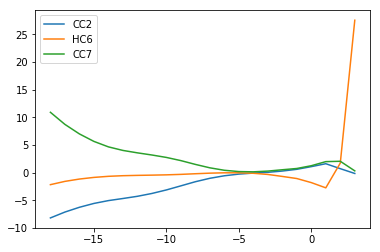

In [96]:
plt.plot(parameter,CC2_q_constrained,label='CC2')
plt.plot(parameter,HC6_q_constrained,label='HC6')
plt.plot(parameter,CC7_q_constrained,label='CC7')
plt.legend()

In [62]:
atoms_of_interest = [63,72,73]

In [61]:
label = ['CC2','CC7','HC6']

In [64]:
data_of_interest = data_array[:,atoms_of_interest,1]

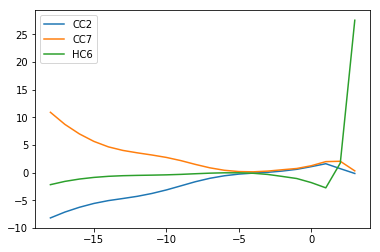

In [69]:
plt.plot(parameter,data_of_interest)
plt.legend(label)

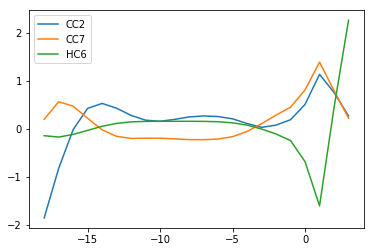

In [70]:
plt.plot(parameter,data_array[:,atoms_of_interest,2])
plt.legend(label)

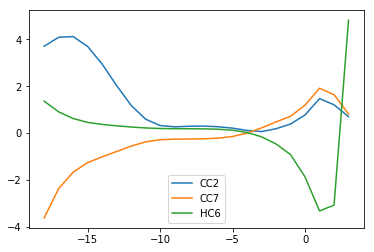

In [75]:
plt.plot(parameter,data_array[:,atoms_of_interest,3])
plt.legend(label)

In [78]:
data_array[:,63,1:]

array([[-8.15788985, -1.85147955,  3.7092256 ],
       [-7.10063181, -0.82094223,  4.09389985],
       [-6.23808575, -0.01280742,  4.12389129],
       [-5.5450494 ,  0.42964985,  3.70114777],
       [-5.03309462,  0.53305101,  2.94821017],
       [-4.6550422 ,  0.43203344,  2.02828171],
       [-4.25738564,  0.2834986 ,  1.1812976 ],
       [-3.74544984,  0.18336126,  0.59071263],
       [-3.10864634,  0.16175393,  0.31837488],
       [-2.37053238,  0.20046629,  0.26452405],
       [-1.62481865,  0.25128762,  0.28742675],
       [-1.00691661,  0.27257241,  0.29576857],
       [-0.55239912,  0.25909771,  0.2678538 ],
       [-0.24924569,  0.21177951,  0.20710327],
       [-0.06452045,  0.11423187,  0.10942471],
       [ 0.07289226,  0.03419563,  0.06156102],
       [ 0.30130451,  0.08155461,  0.18276453],
       [ 0.61618283,  0.19339733,  0.38398433],
       [ 1.09773471,  0.51238657,  0.77168664],
       [ 1.62651539,  1.1385554 ,  1.46881406],
       [ 0.73196727,  0.75971933,  1.205

In [102]:
legend = ["fully constrained", "unconstrained", 
            "only qtot constrained", "charge groups and qtot constrained",
            "symmetries and qtot constrained"]

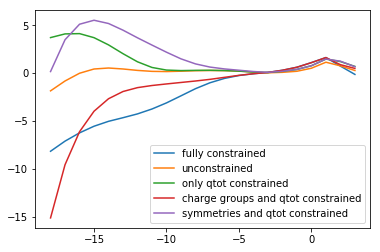

In [103]:
plt.plot(parameter,data_array[:,63,1:])
plt.legend(legend)

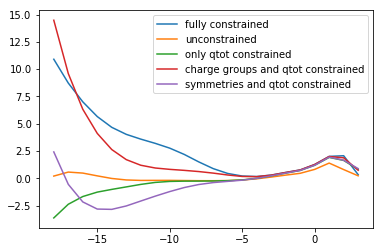

In [104]:
plt.plot(parameter,data_array[:,72,1:])
plt.legend(legend)

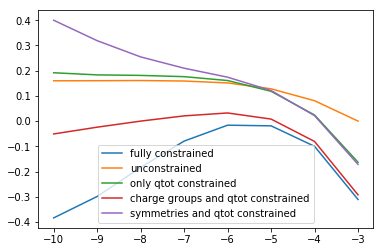

In [105]:
# HC6
plt.plot(parameter[8:16],data_array[8:16,73,1:])
plt.legend(legend)

In [107]:
CC1 = 61
HC1 = 62
CC2 = 63
CC3 = 64
HC2 = 65
CC5 = 68
CC7 = 72
HC6 = 73

In [109]:
range_of_interest = range(8,16)

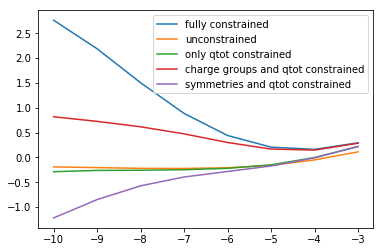

In [111]:
# CC7
plt.plot(parameter[range_of_interest],data_array[range_of_interest,CC7,1:])
plt.legend(legend)

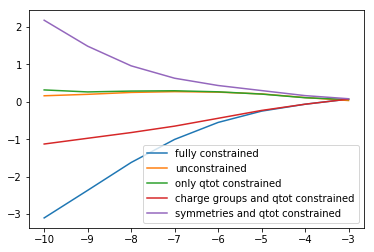

In [112]:
# CC2
plt.plot(parameter[range_of_interest],data_array[range_of_interest,CC2,1:])
plt.legend(legend)

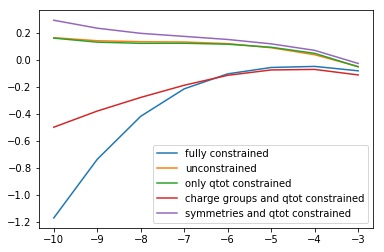

In [113]:
# HC2
plt.plot(parameter[range_of_interest],data_array[range_of_interest,HC2,1:])
plt.legend(legend)

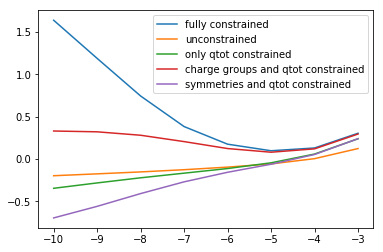

In [114]:
# CC7
plt.plot(parameter[range_of_interest],data_array[range_of_interest,CC5,1:])
plt.legend(legend)

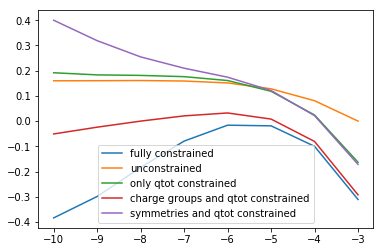

In [116]:
# CC7
plt.plot(parameter[range_of_interest],data_array[range_of_interest,HC6,1:])
plt.legend(legend)

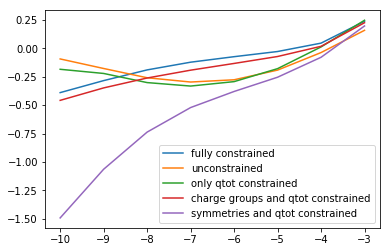

In [118]:
# CC1
plt.plot(parameter[range_of_interest],data_array[range_of_interest,CC1,1:])
plt.legend(legend)

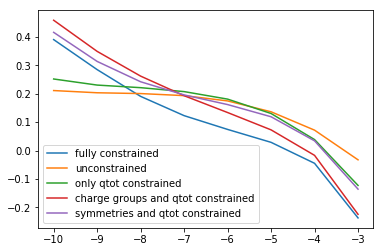

In [119]:
plt.plot(parameter[range_of_interest],data_array[range_of_interest,HC1,1:])
plt.legend(legend)